## Ensemble Learning
#### Bagging and Boosting : These are the two techniques ghrough which multiple models combined together for the accurcy improvement.


## Bagging

![Screenshot 2025-05-19 at 5.34.55 PM.png](<attachment:Screenshot 2025-05-19 at 5.34.55 PM.png>)










## Boosting
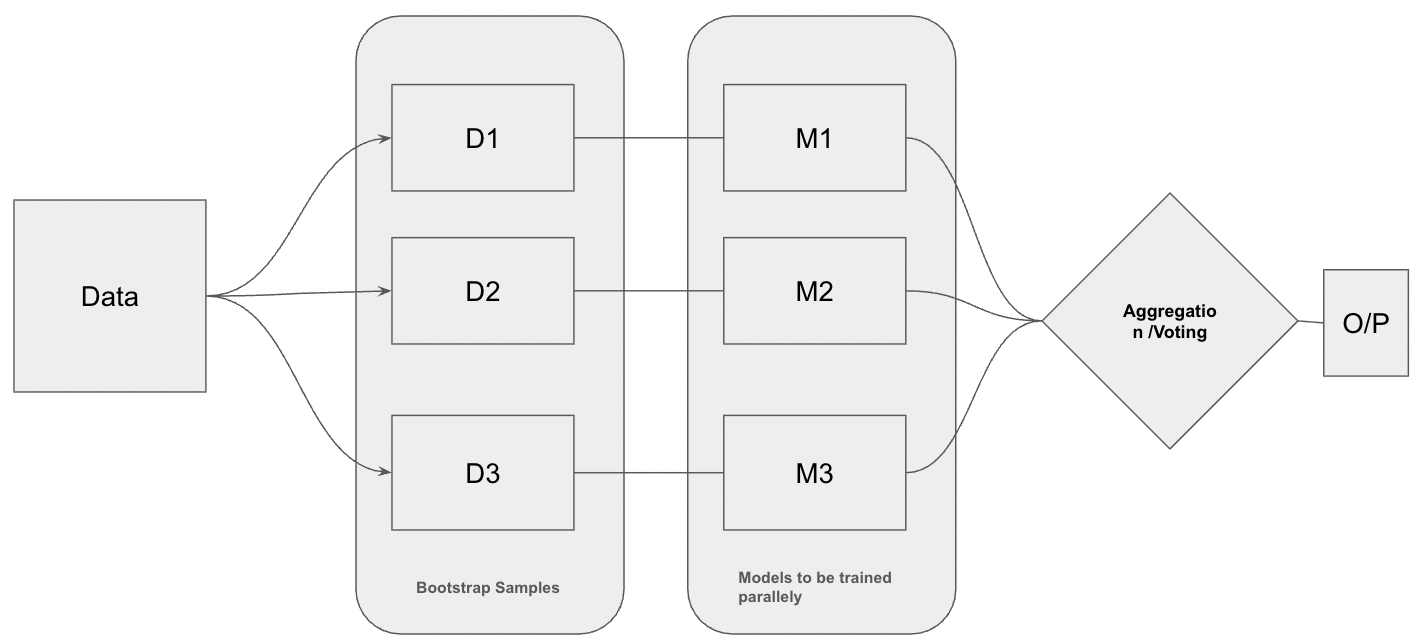

## Random Forest
## Why should we use instead of Decision Tree : 
            ### Time complexity may be high because we are going to train multiple models.
            ### But this model will reduce the problem of overfitting (Low Bias [HIgh Train accuracy], and High Variance [low test accuracy]), as many base model have been used which improves the test accuracy.

### 1. Problem Statement

In [5]:
## Data Collection

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aravindanr22052001/travelcsv")

print("Path to dataset files:", path)

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 79.6k/79.6k [00:00<00:00, 172kB/s]

Extracting files...
Path to dataset files: /Users/balmukundmishra/.cache/kagglehub/datasets/aravindanr22052001/travelcsv/versions/1


In [6]:
df=pd.read_csv("/Users/balmukundmishra/.cache/kagglehub/datasets/aravindanr22052001/travelcsv/versions/1/Travel.csv")

In [7]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
## Data Cleaning

df.isnull()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4884,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4885,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4886,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
## lets check for all the categories

df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [17]:
## lets check for all the categories

df['CityTier'].value_counts()

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

In [18]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

In [19]:
## lets check for all the categories

df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [21]:
## Checking Missing Values
## These are the feature with nan values

features_with_nan = [features for features in df.columns if df[features].isnull().sum()>=1]


In [22]:
features_with_nan

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [33]:
## Lets check the details of collumns and missing values

for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean()*100,3), "% missing values")
    #print(feature, np.round(df[feature].isnull()*100, 5), '% missing values')

Age 4.624 % missing values
TypeofContact 0.511 % missing values
DurationOfPitch 5.135 % missing values
NumberOfFollowups 0.921 % missing values
PreferredPropertyStar 0.532 % missing values
NumberOfTrips 2.864 % missing values
NumberOfChildrenVisiting 1.35 % missing values
MonthlyIncome 4.767 % missing values


In [34]:
df[features_with_nan].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null Values

    ### Imputing mean value for Age collumn
    ### Imputing mode value for type of Contract collumn
    ### Imputing Median for Duration of Pitch
    ### Iputing MOde for NumberofFollowup [Discrete Feature]
    ### Impute mode for preferredPropertystart
    ### Impute mdeian for NumberOfTrips
    ### Impute mode for NumberOfChildrenVisiting
    ### Impute mdedian for MonthlyIncome


In [36]:
df.Age.fillna(df.Age.median(), inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.median(), inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [37]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [38]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [39]:
df.drop('CustomerID', inplace=True, axis=1)

## Feature Engineering

### 1. Feature Extraction

In [83]:
## Combining features

df['Total_Visiting'] = df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_Visiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [84]:
## get all the numeric features

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print("Number of Numeric features", len(numeric_features))

Number of Numeric features 14


In [85]:
## Get all the categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("number of categorical feature", len(cat_features))

number of categorical feature 6


In [86]:
## get all the discrete features

discrete_feature = [feature for feature in numeric_features if len(df[feature].unique())>20]

print("number of discrete features",len(discrete_feature))


number of discrete features 3


In [87]:
## get all the discrete features

contineous_feature = [feature for feature in numeric_features if len(df[feature].unique())<=20]

print("number of contineous features",len(contineous_feature))

number of contineous features 11


In [88]:
len(numeric_features)

14

In [89]:
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [90]:
y.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((3910, 19), (978, 19))

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4888 non-null   float64
 1   TypeofContact             4888 non-null   object 
 2   CityTier                  4888 non-null   int64  
 3   DurationOfPitch           4888 non-null   float64
 4   Occupation                4888 non-null   object 
 5   Gender                    4888 non-null   object 
 6   NumberOfPersonVisiting    4888 non-null   int64  
 7   NumberOfFollowups         4888 non-null   float64
 8   ProductPitched            4888 non-null   object 
 9   PreferredPropertyStar     4888 non-null   float64
 10  MaritalStatus             4888 non-null   object 
 11  NumberOfTrips             4888 non-null   float64
 12  Passport                  4888 non-null   int64  
 13  PitchSatisfactionScore    4888 non-null   int64  
 14  OwnCar  

In [93]:
cat_features

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [94]:
cat_feature1 = X.select_dtypes(include='object').columns
cat_feature1

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [95]:
num_feature1 = X.select_dtypes(exclude='object').columns
num_feature1

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'Total_Visiting'],
      dtype='object')

In [96]:
## Now we need to apply ecoding and scaling of the feature as data pre-processing step
## lets take two techniques OneHotencoder for categorical feature and StandardScaler for numerical features, these are from sklearn library

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_hencoder = OneHotEncoder(drop='first')

In [97]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hencoder, cat_feature1),
        ("StandardScaler", numeric_transformer, num_feature1 )
    ]
)

In [98]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'Total_Visiting'],
      dtype='object'))])

In [99]:
X_train = preprocessor.fit_transform(X_train)


In [100]:
X_train

array([[ 1.        ,  0.        ,  0.        , ..., -0.21805023,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.95629743,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ..., -0.21805023,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.95629743,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.95629743,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.39239789,
        -1.08251091, -1.48303461]])

In [103]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.252472,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.218050,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.129347,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,0.956297,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.218050,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.129347,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,-0.218050,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.511165,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,2.130645,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,0.956297,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.129347,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,-0.218050,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,0.956297,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.129347,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,0.956297,-0.252799,0.643615


In [101]:
## Lets apply our transformation on test data

X_test = preprocessor.transform(X_test)

In [102]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -0.21805023,
        -0.73751038, -0.77415132],
       [ 1.        ,  0.        ,  0.        , ..., -0.21805023,
        -0.6704111 , -0.06526803],
       [ 1.        ,  0.        ,  0.        , ..., -1.39239789,
        -0.4208322 , -0.77415132],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.95629743,
         0.69001249,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ..., -0.21805023,
        -0.22827818, -0.77415132],
       [ 1.        ,  1.        ,  0.        , ...,  2.13064508,
        -0.44611323,  2.06138184]])

In [104]:
## Now we are ready for Machine learning training

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score,recall_score, f1_score, roc_auc_score, roc_curve



In [ ]:
## Lets see the effienct way of model training

In [108]:
models = {
    "Random Forest" : RandomForestClassifier()
}
    

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Test set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average = 'weighted')

    print(list(models.values())[i])
    print("-------------------------------")
    print("Model Performance for train set")
    print("Model accuracy on train set", model_train_accuracy)
    print("model f1 score on train set", model_train_f1)
    print("--------------------------")
    print("Model performance on Test set")
    print("Test set accuracy", model_test_accuracy)
    print("Test set f1", model_test_f1)

RandomForestClassifier()
-------------------------------
Model Performance for train set
Model accuracy on train set 1.0
model f1 score on train set 1.0
--------------------------
Model performance on Test set
Test set accuracy 0.9100204498977505
Test set f1 0.9002786758530312


In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
models = {
    "Random Forest" : RandomForestClassifier(),
    "Ada Boost" : AdaBoostClassifier()
}
    

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Test set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average = 'weighted')

    print(list(models.values())[i])
    print("-------------------------------")
    print("Model Performance for train set")
    print("Model accuracy on train set", model_train_accuracy)
    print("model f1 score on train set", model_train_f1)
    print("--------------------------")
    print("Model performance on Test set")
    print("Test set accuracy", model_test_accuracy)
    print("Test set f1", model_test_f1)

RandomForestClassifier()
-------------------------------
Model Performance for train set
Model accuracy on train set 1.0
model f1 score on train set 1.0
--------------------------
Model performance on Test set
Test set accuracy 0.9141104294478528
Test set f1 0.9057208724327075
AdaBoostClassifier()
-------------------------------
Model Performance for train set
Model accuracy on train set 0.8549872122762149
model f1 score on train set 0.833595792559424
--------------------------
Model performance on Test set
Test set accuracy 0.8333333333333334
Test set f1 0.8076869644761617


In [122]:
rf_params = {
    'max_depth' : [5,8,15,None,10],
    'max_features' : [5,7,'auto', 8],
    'min_samples_split': [2,8,15,20],
    "n_estimators": [100,200,500,100]
}

adaboost_params = {
    "n_estimators": [50,60,70,80],
    "algorithm" :['SAME', 'SAMME.R'] 
   
}

In [123]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 100]}

In [124]:
adaboost_params

{'n_estimators': [50, 60, 70, 80], 'algorithm': ['SAME', 'SAMME.R']}

In [125]:
randomcv_model = [
    ("RF", RandomForestClassifier(),rf_params),
    ("ADaboost", AdaBoostClassifier(), adaboost_params)
]

In [126]:
randomcv_model

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 100]}),
 ('ADaboost',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80], 'algorithm': ['SAME', 'SAMME.R']})]

In [127]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_model:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1
                                )
    
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_


for model_name in model_param:
    print(f"-----Best Params for {model_name}")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.3s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=7, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=7, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=8, max_features=7, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=5, min_samples_split=15, n_estimators=500; total time=   1.3s
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=500; total time=   1.7s
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=500; total time=   1.8s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=N

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=10, max_features=8, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=500; total time=   1.1s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=500; total time=   1.4s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=500; total time=   1.7s
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=500; total time=   1.6s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_de

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=None, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_d

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=8, max_features=7, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.6s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.4s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=   1.1s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=   1.1s
[CV] END max_depth=8, max_features=8, min_samples_split=15, n_estimators=500; total time=   1.4s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=8, min_samples_split=15, n_estimators=500; total time=   1.4s
[CV] END max_depth=8, max_features=8, min_samples_split=15, n_estimators=500; total time=   1.4s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=200; total time=   0.5s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=   1.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=7, min_samples_split=15, n_estimators=500; total time=   1.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=7, min_samples_split=15, n_estimators=500; total time=   1.1s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=7, min_samples_split=15, n_estimators=500; total time=   1.1s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.3s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=500; total time=   0.8s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=500; total time=   0.8s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=No

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=7, min_samples_split=20, n_estimators=500; total time=   1.5s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.4s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=8, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.3s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.9s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=100; total time=   

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.3s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=None, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=8, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=500; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=500; total time=   1.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=500; total time=   1.1s
[CV] END max_depth

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.4s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ....................algorithm=SAME, n_estimators=50; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=50; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=50; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=60; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=60; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=60; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=70; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=70; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=70; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=80; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=80; total time=   0.0s
[CV] END ....................algorithm=SAME, n_es

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 581, in _validate_params


In [ ]:
## Adaboost and RF Regression : Implement it with the Same data
## What is the dependent variable for the regression in this dataset
## What should be the validation metrics for the models and why.